# Exercise III: Linear Regression

> In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). [*Wikipedia*](https://en.wikipedia.org/wiki/Linear_regression)

Using linear regression with Python is as easy as running:

```python
>>> from sklearn.linear_model import LinearRegression
>>> model = LinearRegression()
>>> model.fit(X_train, y_train)
>>> predictions = model.predict(X_test)
```

## Diabetes

First, let's reproduce `scikit-learn`'s [Linear Regerssion Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#linear-regression-example) using the prepackaged `diabetes` dataset.

### Loading the Dataset

In [1]:
import pandas as pd

from sklearn import datasets

# Read the dataset as a pandas DataFrame
dataset = datasets.load_diabetes(as_frame=True)

# Create observations matrix and target vector
X, y = dataset.data, dataset.target

# Create a unified DataFrame containing both
data = pd.concat([X, y], axis=1)

### Basic Exploration

#### Dataset Description

In [2]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Raw Inspection

In [9]:
import numpy as np
import pandas as pd

# Select some sample indices
sample_indices = np.linspace(0, len(X) - 4, 4, dtype=int)
sample_indices = [index for i in sample_indices for index in range(i, i + 4)]

# Print data table (features and target)
data.iloc[sample_indices, :].style.set_properties(**{
    "text-align": "center",
}).set_properties(**{
    "border-left": "4px solid black"
}, subset=['target']).set_table_styles([
    dict(selector="th", props=[("font-size", "13px")]),
    dict(selector="td", props=[("font-size", "11px")]),
]).background_gradient().format("{:.3f}")

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,151.000
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,75.000
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,141.000
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,206.000
146,-0.031,0.051,0.060,0.001,0.012,0.032,-0.043,0.034,0.015,0.007,178.000
147,-0.056,-0.045,0.093,-0.019,0.015,0.023,-0.029,0.025,0.026,0.040,128.000
148,-0.060,0.051,0.015,-0.019,0.037,0.048,0.019,-0.003,-0.031,-0.001,96.000
149,-0.049,0.051,-0.005,-0.047,-0.021,-0.020,-0.069,0.071,0.061,-0.038,126.000
292,0.009,-0.045,-0.022,-0.032,-0.050,-0.069,0.078,-0.071,-0.063,-0.038,84.000
293,-0.071,-0.045,0.093,0.013,0.020,0.043,0.001,0.000,-0.055,-0.001,200.000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [15]:
pd.set_option('float_format', '{:g}'.format)
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442,442,442,442,442,442,442,442,442,442,442
mean,-2.51182e-19,1.23079e-17,-2.24556e-16,-4.79757e-17,-1.3815e-17,3.91843e-17,-5.77718e-18,-9.04254e-18,9.29372e-17,1.13032e-17,152.133
std,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,77.093
min,-0.107226,-0.0446416,-0.0902753,-0.112399,-0.126781,-0.115613,-0.102307,-0.0763945,-0.126097,-0.137767,25
25%,-0.0372993,-0.0446416,-0.0342291,-0.0366561,-0.0342478,-0.0303584,-0.0351172,-0.0394934,-0.0332456,-0.033179,87
50%,0.00538306,-0.0446416,-0.00728377,-0.00567042,-0.00432087,-0.00381907,-0.00658447,-0.00259226,-0.00194717,-0.0010777,140.5
75%,0.0380759,0.0506801,0.031248,0.0356438,0.028358,0.0298444,0.0293115,0.0343089,0.0324323,0.0279171,211.5
max,0.110727,0.0506801,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133597,0.135612,346


#### Scatter Matrix

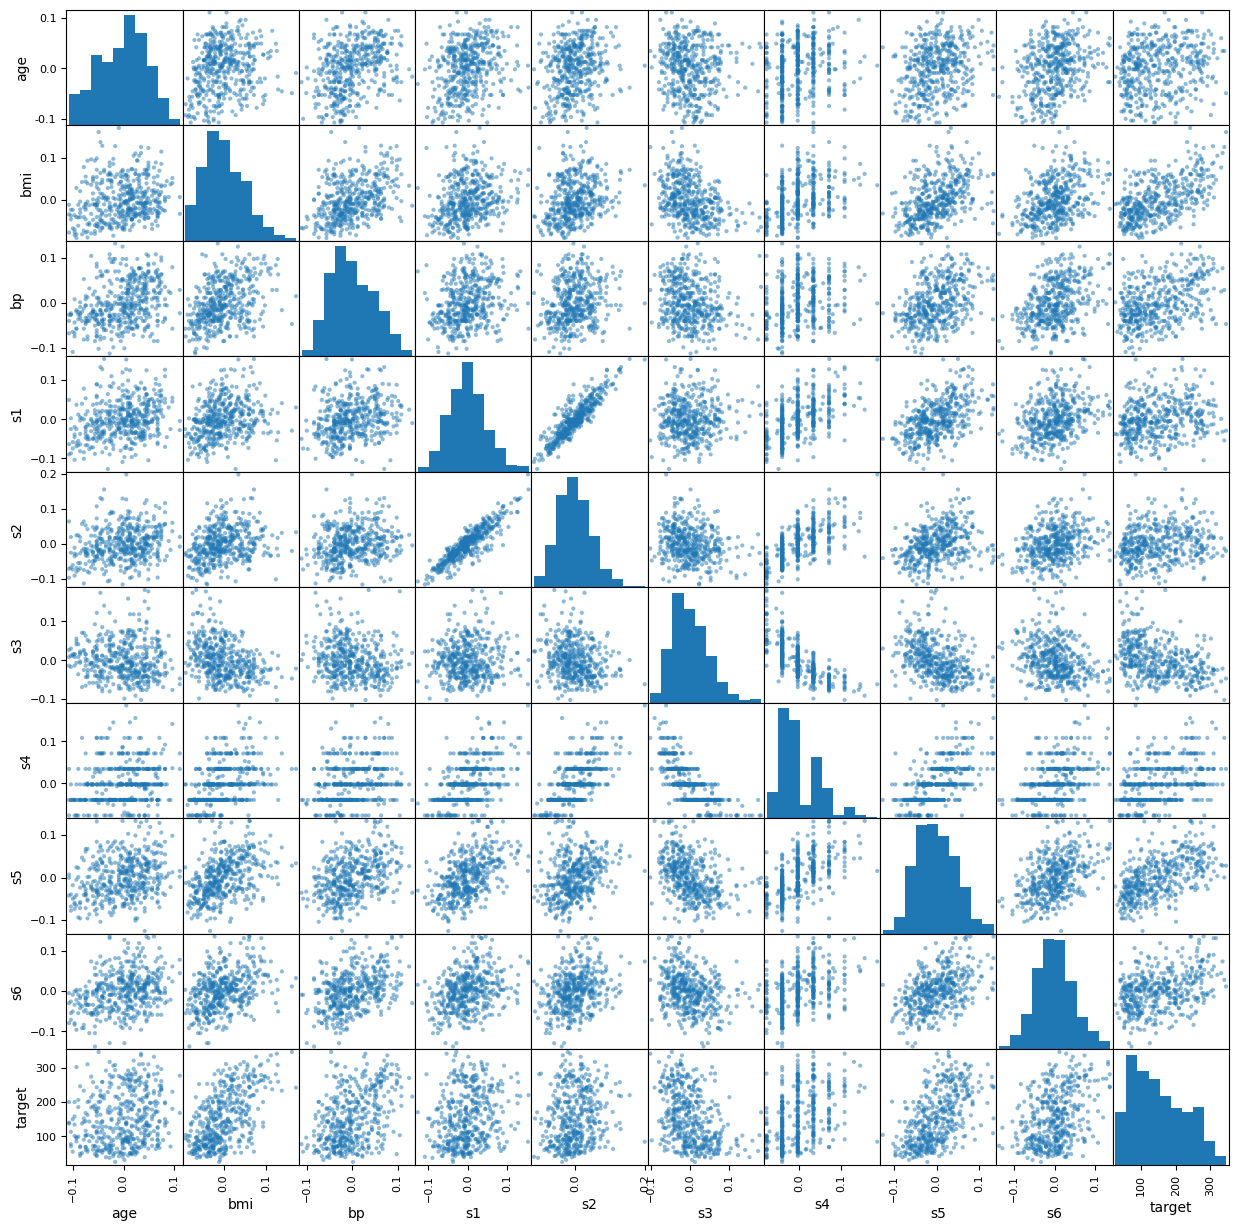

In [16]:
import matplotlib.pyplot as plt

# Extract numeric data
numeric_data = data.drop(["sex"], axis=1)

# Plot scatter matrix
axes = pd.plotting.scatter_matrix(numeric_data, figsize=(15, 15))

# Fix y-axis label formatting
new_labels = [
    round(float(i.get_text()), 2) for i in axes[0, 0].get_yticklabels()
]
_ = axes[0, 0].set_yticklabels(new_labels)

#### Feature Correlation

We can use `seaborn`'s [`heatmap`](http://seaborn.pydata.org/generated/seaborn.heatmap.html) function to inspect feature correlations.

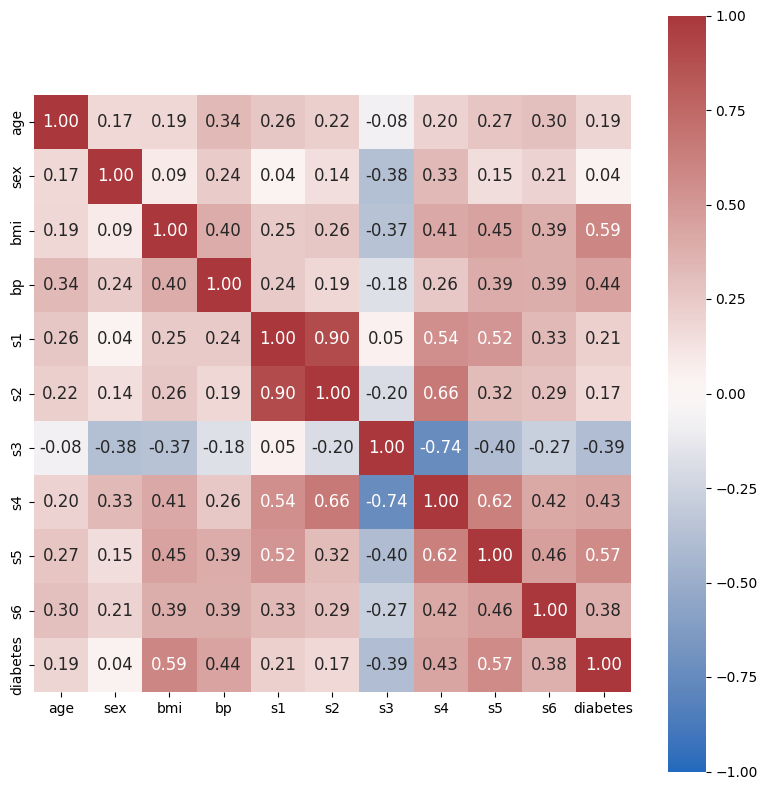

In [17]:
import seaborn as sns

# Calculate correlation matrix using NumPy
correlation_matrix = np.corrcoef(data.values.T)

# Plot correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(8, 8))
tick_labels = list(X.columns) + ['diabetes']
hm = sns.heatmap(
    correlation_matrix,
    ax=ax,
    cbar=True,  # Show colorbar
    cmap="vlag",  # Specify colormap
    vmin=-1,  # Min. value for colormapping
    vmax=1,  # Max. value for colormapping
    annot=True,  # Show the value of each cell
    square=True,  # Square aspect ratio in cell sizing
    fmt='.2f',  # Float formatting
    annot_kws={'size':
               12},  # Font size of the values displayed within the cells
    xticklabels=tick_labels,  # x-axis labels
    yticklabels=tick_labels)  # y-axis labels
plt.tight_layout()
plt.show()

### Simple Linear Regression

Simple linear regression is a linear regression model with a single explanatory variable. `bmi` seems to show a discernible linear relationship with the target variable, so let's go with that one. 

#### Train/Test Split

In [18]:
from sklearn.model_selection import train_test_split

# Create a vector of the single predictor values
simple_X = X.bmi.to_numpy().reshape(len(X), 1)

# Split for simple linear regression
simple_X_train, simple_X_test, y_train, y_test = train_test_split(simple_X,
                                                                  y,
                                                                  random_state=0,
                                                                  test_size=0.2)

In [19]:
from myst_nb import glue

glue("n_train_diabetes", len(simple_X_train), display=False)
glue("n_test_diabetes", len(simple_X_test), display=False)

We now have a training dataset consisting of {glue:}`n_train_diabetes` observations and a test dataset with {glue:}`n_test_diabetes` observations.

#### Model Creation

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
_ = model.fit(simple_X_train, y_train)

#### Model Application

In [21]:
simple_y_pred = model.predict(simple_X_test)

#### Model Evaluation

First, we'll plot our predicted values alongside the observed values, as well as the regression line estimated by our model.

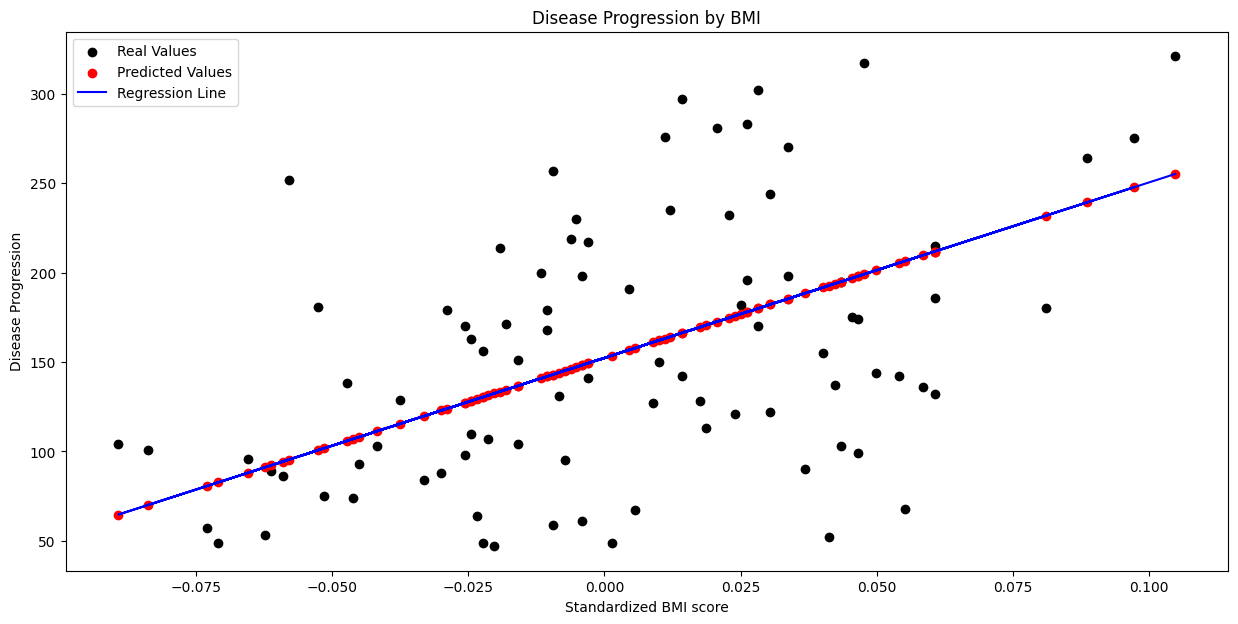

In [22]:
# Create figure
fig, ax = plt.subplots(figsize=(15, 7))

# Plot real values scatter plot
_ = plt.scatter(simple_X_test, y_test, color="black", label="Real Values")

# Plot predicted values scatter plot
_ = plt.scatter(simple_X_test,
                simple_y_pred,
                color="red",
                label="Predicted Values")

# Plot regression line
_ = plt.plot(simple_X_test,
             simple_y_pred,
             color="blue",
             label="Regression Line")

# Show legend
_ = plt.legend()

# Set title
title = "Disease Progression by BMI"
plt.title(title)

# Sex axis labels
ax.set_xlabel("Standardized BMI score")
_ = ax.set_ylabel("Disease Progression")

We can also use the [`sklearn.metrics`](https://scikit-learn.org/stable/modules/model_evaluation.html) module to calculate the [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) and [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) ($R^2$).

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, simple_y_pred)
r_squared = r2_score(y_train, model.predict(simple_X_train))
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f'Mean Squared Error: {mse:.2f}')
print(f'Coefficient of Determination: {r_squared:.2f}')

Coefficient: 981.66
Intercept: 152.29
Mean Squared Error: 4150.68
Coefficient of Determination: 0.38


### Multiple Linear Regression

General notation:

![OLS](https://wikimedia.org/api/rest_v1/media/math/render/svg/5d4d7a9152344a9b203e651e82834c16cb085365)

Calculating the coefficient vector of the least-squares hyperplane:

![OLS beta hat](https://wikimedia.org/api/rest_v1/media/math/render/svg/b6001f896b83cf90fdc5c544743ceec61b7c83fd)

#### Manual Implementation

While it is always best to use the standard tools Python offers, let's be educationally paranoid for a minute and create our own implementation of ordinary least-squared (OLS) multiple linear regression. 

A simplist implementation might look something like:

```{margin}
This code is adapted from Chapter 3 of Machine Learning: An Algorithmic Perspective (2nd Edition) by Stephen Marsland ([website](http://stephenmonika.net), [code source](https://github.com/alexsosn/MarslandMLAlgo/blob/master/Ch3/linreg.py)).
```

```{literalinclude} manual_linear_regression.py
    :lines: 1-62
```

```{margin}
The `@` operator actually calls the [`np.matmul()`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html#numpy.matmul) function rather than [`np.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot), however, because we don't use 3 (or higher) dimension arrays, the two functions behave the same in our use case.
```

Another version, which better conforms with standard implementations in machine learning models, might look something like:

```{literalinclude} manual_linear_regression.py
    :pyobject: ManualLinearRegression
```

##### Model Application

In [24]:
from manual_linear_regression import calculate_predictions, estimate_coefficients

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=0,
                                                    test_size=0.2)
beta_hat = estimate_coefficients(X_train, y_train)
y_pred_manual = calculate_predictions(X_test, beta_hat)

or:

In [41]:
from manual_linear_regression import ManualLinearRegression

In [42]:
manual_model = ManualLinearRegression()
manual_model.fit(X_train, y_train)
y_pred_manual = manual_model.predict(X_test)

##### Model Evaluation

###### $R^2$

Calculate the [residual sum of squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares) ($RSS$):

````{panels}
General notation
^^^
![RSS general notation](https://wikimedia.org/api/rest_v1/media/math/render/svg/f8852833a56a9b55fdf5d6b2521eaec45274bab8)
---
Matrix notation
^^^
![RSS linear notation](https://wikimedia.org/api/rest_v1/media/math/render/svg/68936d9b62f488dcc66120282485c13a0755bf3d)
````

In [43]:
ss_residual = np.sum((y_train - manual_model.predict(X_train))**2)
ss_residual

965367.067373737

Calculate the [total sum of squares](https://en.wikipedia.org/wiki/Total_sum_of_squares) ($TSS$):

![TSS](https://wikimedia.org/api/rest_v1/media/math/render/svg/24f49fd012d7208436fc502fdb1f0065605951e6)

In [44]:
ss_total = np.sum((y_train - y_train.mean())**2)
ss_total

2164136.266288952

Calculate $R^2$:

![R squared](https://wikimedia.org/api/rest_v1/media/math/render/svg/c7e3ab84636f38c257641f85f009bcb422c73151)

In [45]:
r2_score_manual = 1 - ss_residual / ss_total
r2_score_manual

0.5539250081377072

Compare with `sklearn`'s built-in `r2_score` function:

In [47]:
r2_score(y_true=y_train, y_pred=manual_model.predict(X_train))

0.5539250081377072

###### Mean Squared Error

Manual $MSE$ calculation:

In [49]:
mse_manual = np.mean((y_train - manual_model.predict(X_train))**2)
mse_manual

2734.7508990757424

Or using `sklearn`:

In [51]:
mean_squared_error(y_train, manual_model.predict(X_train))

2734.7508990757424

#### Multiple Linear Regression using `sklearn`

##### Model Creation

In [52]:
multiple_model = LinearRegression()
_ = multiple_model.fit(X_train, y_train)

##### Model Application

In [53]:
y_pred_all = multiple_model.predict(X_test)

##### Model Evaluation

In [54]:
mse_all = mean_squared_error(y_train, multiple_model.predict(X_train))
r2_score_all = r2_score(y_train, multiple_model.predict(X_train))

In [56]:
betas_all_repr = [beta.round(2) for beta in multiple_model.coef_.flatten()]

print(f"Coefficient: {betas_all_repr}")
print(f'Mean Squared Error: {mse_all:.2f}')
print(f'Coefficient of Determination: {r2_score_all:.2f}')

Coefficient: [-35.55, -243.17, 562.76, 305.46, -662.7, 324.21, 24.75, 170.32, 731.64, 43.03]
Mean Squared Error: 2734.75
Coefficient of Determination: 0.55
